# Data Loading and Preprocessing
Here we import the dataset and the libraries for our LSTM model

In [2]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from torch.utils.data import Subset 
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score
)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Configure visualization settings
sns.set_context("notebook", font_scale=1.5)

# Load the dataset
file_path = 'C:/Users/pc/Desktop/politecnico/b-FINTECH/business cases/Fintech_BC/BC4/data/Dataset4_EWS.xlsx'
#file_path = './data/Dataset4_EWS.xlsx'

## Real-World dataset

From Bloomberg, consisting of weekly observations of:

- Market and macroeconomic indicators (e.g., indices, rates).
- A response variable `Y` indicating **anomalous periods** (e.g., market stress events).

Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


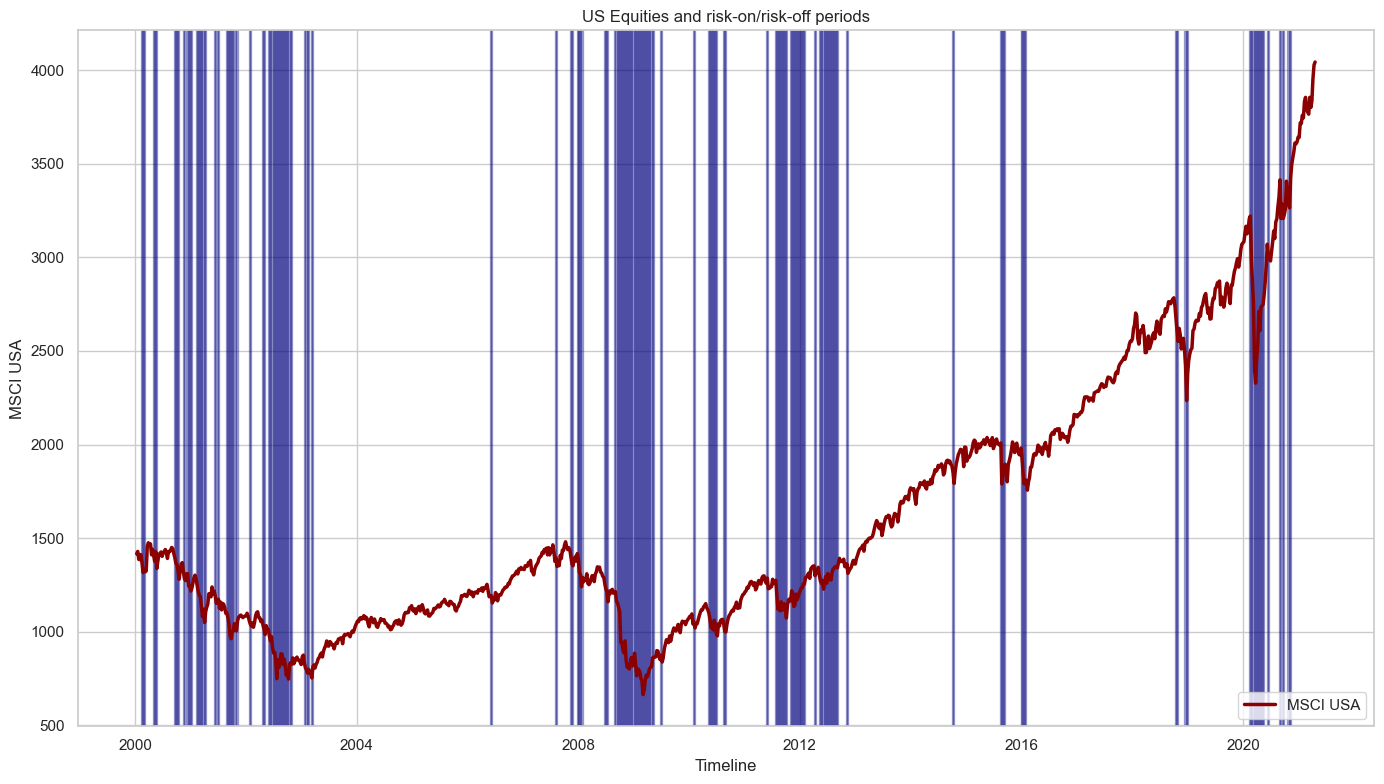

In [3]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index, X_df['MXUS'], color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


# Data Structure class to manage snapshots of the time series

**Purpose**:  
This PyTorch Dataset class that creates sliding windows from input data and prepares the sequences for our LSTM model.

**Key Functionality**:

1. **Initialization** (`__init__`):
   - Takes input features `X` (DataFrame) and labels `y`
   - Creates sliding windows of specified `window_size` with configurable `overlap`
   - Converts windows to PyTorch tensors (float32)
   - For labeled data:
     - Calculates and prints class distribution (normal vs anomaly samples)
     - Computes positive class weight for imbalance handling (`normal_count/anomaly_count`)

2. **Sliding Window Creation**:
   - Windows are created with stride = `window_size - overlap`
   - Each window contains `window_size` consecutive time steps

3. **Class Statistics**:
   - Prints total number of samples and window shape
   - For labeled data:
     - Reports count of normal (0) and anomaly (1) samples
     - Calculates and displays class weight for handling imbalance

4. **Core Dataset Methods**:
   - `__len__`: Returns total number of windows
   - `__getitem__`: Returns:
     - For labeled data: (window_tensor, target_label)
     - For unlabeled data: window_tensor only

**Key Parameters**:
- `window_size`: Number of time steps in each window
- `overlap`: Number of overlapping time steps between consecutive windows
- `pos_weight`: Class weight for anomaly class (useful for imbalanced data)


In [4]:

class TimeseriesAnomalyDataset(Dataset):
    """
    Dataset class for time series anomaly detection with sliding windows.
    """
    def __init__(self, X, y=None, window_size=32, overlap=1):
        self.window_size = window_size
        self.overlap = overlap
        
        # Create sliding windows
        self.samples = []
        self.targets = []
        
        for i in range(0, len(X) - window_size + 1, window_size - overlap):
            end = i + window_size
            if isinstance(X, pd.DataFrame):
                X_window = torch.tensor(X.iloc[i:end].values, dtype=torch.float32)
            else:
                X_window = torch.tensor(X[i:end], dtype=torch.float32)
            
            if y is not None:
                y_target = int(y[end-1])  # Take the last value as target
                self.targets.append(y_target)
            
            self.samples.append(X_window)
        
        self.has_targets = y is not None
        print(f"Created dataset with {len(self.samples)} samples of shape {self.samples[0].shape}")
        
        if self.has_targets:
            # Print class distribution
            normal_count = sum(1 for t in self.targets if t == 0)
            anomaly_count = sum(1 for t in self.targets if t == 1)
            print(f"Normal samples: {normal_count}, Anomaly samples: {anomaly_count}")
            
            # Calculate class weights for balancing
            total = len(self.targets)
            self.pos_weight = normal_count / max(anomaly_count, 1)
            print(f"Positive class weight: {self.pos_weight:.2f}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if self.has_targets:
            return self.samples[idx], torch.tensor(self.targets[idx], dtype=torch.long)
        return self.samples[idx]

### LSTMModel Class
 
In this class we implement our LSTM-based neural network for our financial time series classification with many advanced model features.

**Key Components**:

1. **Architecture**:
   - Stacked bidirectional LSTM layers with configurable hidden sizes
   - Batch normalization after each LSTM layer
   - Dropout for regularization
   - Two fully-connected layers at the end (32 units → num_classes)

2. **Key Features**:
   - **Bidirectional LSTMs**: Optional bidirectional processing
   - **Batch Normalization**: Applied after each LSTM layer and before final FC
   - **Custom Weight Initialization**:
     - Xavier/orthogonal for LSTM weights
     - Kaiming for first FC layer
   - **Progressive Dropout**: Higher dropout in LSTM layers than FC layers

3. **Forward Pass**:
   1. Input shape: `(batch_size, seq_len, input_size)`
   2. Pass through each LSTM layer with batch norm and dropout
   3. Take last timestep output only
   4. Process through FC layers with ReLU activation

4. **Configuration Parameters**:
   - `input_size`: Number of input features
   - `hidden_sizes`: List of hidden layer sizes (e.g., [100, 50] for two layers)
   - `num_classes`: Output dimension (2 for binary classification)
   - `dropout_rate`: Dropout probability (0.3 default)
   - `bidirectional`: Whether to use bidirectional LSTM (True default)
   - `l2_reg`: L2 regularization strength (0.001 default)

**Initialization Details**:
- LSTM weights: Xavier uniform (input), orthogonal (hidden)
- FC weights: Kaiming (first layer), Xavier (output layer)
- Biases initialized to zero

**Output**:
- Raw logits (no softmax) of shape `(batch_size, num_classes)`

**Example Usage**:
```python
model = LSTMModel(input_size=10, hidden_sizes=[128, 64])
output = model(input_tensor)  # input_tensor: (batch, seq_len, 10)

In [5]:
class LSTMModel(nn.Module):
    """
    PyTorch LSTM model for time series classification.
    """
    def __init__(self, input_size, hidden_sizes=[100, 50], num_classes=2, 
                 dropout_rate=0.3, bidirectional=True, l2_reg=0.001):
        super(LSTMModel, self).__init__()
        
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.num_classes = num_classes
        self.bidirectional = bidirectional
        self.dropout_rate = dropout_rate
        
        # Build LSTM layers
        self.lstm_layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        
        prev_size = input_size
        for i, hidden_size in enumerate(hidden_sizes):
            # LSTM layer
            lstm = nn.LSTM(
                input_size=prev_size,
                hidden_size=hidden_size,
                batch_first=True,
                bidirectional=bidirectional,
                dropout=dropout_rate if i < len(hidden_sizes) - 1 else 0
            )
            self.lstm_layers.append(lstm)
            
            # Batch normalization
            bn_size = hidden_size * 2 if bidirectional else hidden_size
            self.batch_norms.append(nn.BatchNorm1d(bn_size))
            
            # Dropout
            self.dropouts.append(nn.Dropout(dropout_rate))
            
            prev_size = bn_size
        
        # Dense layers
        self.fc1 = nn.Linear(prev_size, 32)
        self.bn_fc = nn.BatchNorm1d(32)
        self.dropout_fc = nn.Dropout(dropout_rate / 2)
        self.fc2 = nn.Linear(32, num_classes)
        
        # Initialize weights
        self._init_weights()
        
    def _init_weights(self):
        """Initialize model weights."""
        for module in self.modules():
            if isinstance(module, nn.LSTM):
                for name, param in module.named_parameters():
                    if 'weight_ih' in name:
                        nn.init.xavier_uniform_(param)
                    elif 'weight_hh' in name:
                        nn.init.orthogonal_(param)
                    elif 'bias' in name:
                        nn.init.zeros_(param)
            elif isinstance(module, nn.Linear):
                if module == self.fc1:
                    nn.init.kaiming_uniform_(module.weight, nonlinearity='relu')
                else:
                    nn.init.xavier_uniform_(module.weight)
                nn.init.zeros_(module.bias)
    
    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        
        for i, (lstm, bn, dropout) in enumerate(zip(self.lstm_layers, self.batch_norms, self.dropouts)):
            # LSTM forward pass
            lstm_out, _ = lstm(x)
            
            # Apply batch normalization (need to reshape for BatchNorm1d)
            batch_size, seq_len, features = lstm_out.shape
            lstm_out = lstm_out.contiguous().view(batch_size * seq_len, features)
            lstm_out = bn(lstm_out)
            lstm_out = lstm_out.view(batch_size, seq_len, features)
            
            # Apply dropout
            lstm_out = dropout(lstm_out)
            x = lstm_out
        
        # Take the last time step output
        x = x[:, -1, :]  # (batch_size, hidden_size)
        
        # Dense layers
        x = F.relu(self.fc1(x))
        x = self.bn_fc(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)
        
        return x

### LSTMTimeSeriesClassifier Class 

**Purpose**:  
A complete PyTorch-based pipeline for time series classification using LSTMs, with built-in data processing, training, and evaluation capabilities.

**Key Functionality**:

1. **Initialization**:
   - Sets sequence length and feature dimensions
   - Auto-detects CUDA/CPU device
   - Configurable data scaling (Standard or MinMax)
   - Tracks training history metrics

2. **Data Processing**:
   - `create_data_loaders()`: Creates sliding window datasets and splits into train/val/test
     - Handles both DataFrame and array inputs
     - Configurable window size and overlap
     - Sequential or shuffled splits
   - Automatic feature dimension detection

3. **Model Building**:
   - `build_model()`: Constructs LSTM model with configurable:
     - Hidden layer sizes
     - Dropout rate
     - Bidirectional option
     - L2 regularization

4. **Training**:
   - `fit_with_loaders()`: Complete training loop with:
     - **Focal Loss** (for class imbalance) or CrossEntropy
     - **Adam optimizer** with weight decay
     - ReduceLROnPlateau **scheduling**
     - Early stopping
     - Best model checkpointing
   - Tracks and stores training/validation metrics

5. **Evaluation & Visualization**:
   - `evaluate_with_loader()`: Computes metrics (accuracy, precision, recall, F1)
   - `plot_training_history()`: Loss and accuracy curves
   - `plot_confusion_matrix()`: Visualizes classification performance
   - `plot_roc_curve()`: ROC curve with AUC calculation
   - Formatted metric reporting

6. **Prediction**:
   - `predict_with_loader()`: Batch prediction with option for probabilities

**Key Features**:
- End-to-end workflow from data to evaluation
- Handles variable-length time series via sliding windows
- Built-in visualization tools
- GPU acceleration support
- Class imbalance handling (Focal Loss)
- Comprehensive model evaluation

**Typical Workflow**:
1. Initialize classifier
2. Create data loaders
3. Train model
4. Evaluate performance
5. Make predictions

In [6]:
from sklearn.metrics import roc_curve, auc

class LSTMTimeSeriesClassifier:
    """
    PyTorch-based LSTM time series classifier with DataLoader support.
    """
    
    def __init__(self, sequence_length=10, n_features=1, scaler_type='standard', device=None):
        """
        Initialize the classifier.
        
        Parameters:
        -----------
        sequence_length : int
            The number of time steps in each input sequence.
        n_features : int
            The number of features at each time step.
        scaler_type : str
            Type of scaler to use ('standard' or 'minmax')
        device : str
            Device to use ('cuda' or 'cpu'). If None, auto-detect.
        """
        self.sequence_length = sequence_length
        self.n_features = n_features
        self.model = None
        self.device = device if device else ('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")
        
        # Choose the appropriate scaler
        if scaler_type.lower() == 'standard':
            self.scaler = StandardScaler()
        elif scaler_type.lower() == 'minmax':
            self.scaler = MinMaxScaler()
        else:
            raise ValueError("scaler_type must be 'standard' or 'minmax'")
            
        self.training_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
        self.class_weights = None
        
    def create_data_loaders(self, X, y, window_size=None, overlap=1, batch_size=32, 
                           train_split=0.7, val_split=0.2, _shuffle=False):
        """
        Create train, validation, and test data loaders.
        
        Parameters:
        -----------
        X : array-like or DataFrame
            Time series data.
        y : array-like
            Class labels.
        window_size : int
            Size of sliding window. If None, uses sequence_length.
        overlap : int
            Overlap between windows (number of point to overlap).
        batch_size : int
            Batch size for data loaders.
        train_split : float
            Fraction of data for training.
        val_split : float
            Fraction of data for validation.
            
        Returns:
        --------
        train_loader, val_loader, test_loader : DataLoader objects
        """
        if window_size is None:
            window_size = self.sequence_length
            
        # Convert inputs to appropriate format
        if isinstance(X, pd.DataFrame):
            X_array = X.values
        else:
            X_array = np.array(X)
            
        y_array = np.array(y)
        
        # Update n_features based on actual data
        if len(X_array.shape) == 1:
            X_array = X_array.reshape(-1, 1)
        self.n_features = X_array.shape[1]
        
        # Scale the data
        X_scaled = self.scaler.fit_transform(X_array)
        
        # Convert back to DataFrame if original was DataFrame for compatibility
        if isinstance(X, pd.DataFrame):
            X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
        
        # Create dataset
        dataset = TimeseriesAnomalyDataset(X_scaled, y_array, window_size=window_size, overlap=overlap)
        
        # Split dataset
        total_size = len(dataset)
        train_size = int(train_split * total_size)
        val_size = int(val_split * total_size)
        test_size = total_size - train_size - val_size

        if _shuffle:
            train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
                dataset, [train_size, val_size, test_size]
            )
        else:
            # Sequential split using indices
            train_indices = list(range(train_size))
            val_indices = list(range(train_size, train_size + val_size))
            test_indices = list(range(train_size + val_size, total_size))
            
            train_dataset = Subset(dataset, train_indices)
            val_dataset = Subset(dataset, val_indices)
            test_dataset = Subset(dataset, test_indices)

        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        
        print(f"Data splits - Train: {train_size}, Val: {val_size}, Test: {test_size}")
        print(f"Input features: {self.n_features}")
        
        return train_loader, val_loader, test_loader
    
    def build_model(self, n_classes=2, hidden_sizes=[100, 50], dropout_rate=0.3, 
                   bidirectional=True, l2_reg=0.001):
        """
        Build the LSTM model.
        
        Parameters:
        -----------
        n_classes : int
            Number of output classes.
        hidden_sizes : list
            List of hidden sizes for LSTM layers.
        dropout_rate : float
            Dropout rate.
        bidirectional : bool
            Whether to use bidirectional LSTM.
        l2_reg : float
            L2 regularization factor.
            
        Returns:
        --------
        model : LSTMModel
            The built model.
        """
        model = LSTMModel(
            input_size=self.n_features,
            hidden_sizes=hidden_sizes,
            num_classes=n_classes,
            dropout_rate=dropout_rate,
            bidirectional=bidirectional,
            l2_reg=l2_reg
        )
        
        return model.to(self.device)
    
    def fit_with_loaders(self, train_loader, val_loader, n_classes=2, epochs=100, 
                        learning_rate=0.001, hidden_sizes=[100, 50], dropout_rate=0.3,
                        bidirectional=True, l2_reg=0.001, focal_loss_gamma=2.0, 
                        focal_loss_alpha=1.0, patience=10, verbose=True, debug=False):
        """
        Train the model using PyTorch DataLoaders.
        
        Parameters:
        -----------
        train_loader : DataLoader
            Training data loader.
        val_loader : DataLoader
            Validation data loader.
        n_classes : int
            Number of classes.
        epochs : int
            Number of training epochs.
        learning_rate : float
            Learning rate for optimizer.
        hidden_sizes : list
            Hidden sizes for LSTM layers.
        dropout_rate : float
            Dropout rate.
        bidirectional : bool
            Whether to use bidirectional LSTM.
        l2_reg : float
            L2 regularization factor.
        focal_loss_gamma : float
            Gamma parameter for focal loss.
        focal_loss_alpha : float
            Alpha parameter for focal loss.
        patience : int
            Early stopping patience.
        verbose : bool
            Whether to print training progress.
        debug : bool
            Whether to print debug information.
            
        Returns:
        --------
        self : LSTMTimeSeriesClassifier
            The fitted classifier.
        """
        
        if debug:
            self.debug_data_loader(train_loader)
        
        # Get input size from first batch
        sample_batch = next(iter(train_loader))
        if isinstance(sample_batch, tuple):
            sample_input = sample_batch[0]
        else:
            sample_input = sample_batch
        
        # Handle case where sample_input might be a list or batch of tensors
        if isinstance(sample_input, list):
            sample_input = sample_input[0]  # Get first sample from list
        if isinstance(sample_input, torch.Tensor):
            self.n_features = sample_input.shape[-1]
        else:
            # If it's still not a tensor, convert it
            sample_input = torch.tensor(sample_input)
            self.n_features = sample_input.shape[-1]
        
        # Build model
        self.model = self.build_model(
            n_classes=n_classes,
            hidden_sizes=hidden_sizes,
            dropout_rate=dropout_rate,
            bidirectional=bidirectional,
            l2_reg=l2_reg
        )
        
        # Define loss function and optimizer
        if n_classes == 2:
            criterion = FocalLoss(alpha=focal_loss_alpha, gamma=focal_loss_gamma)
        else:
            criterion = nn.CrossEntropyLoss()
            
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=l2_reg)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, 
                                                        patience=5, verbose=verbose)
        
        # Training loop
        best_val_loss = float('inf')
        patience_counter = 0
        
        for epoch in range(epochs):
            # Training phase
            self.model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0
            
            for batch_idx, (data, targets) in enumerate(train_loader):
                data, targets = data.to(self.device), targets.to(self.device)
                
                optimizer.zero_grad()
                outputs = self.model(data)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += targets.size(0)
                train_correct += (predicted == targets).sum().item()
            
            # Validation phase
            self.model.eval()
            val_loss = 0.0
            val_correct = 0
            val_total = 0
            
            with torch.no_grad():
                for data, targets in val_loader:
                    data, targets = data.to(self.device), targets.to(self.device)
                    outputs = self.model(data)
                    loss = criterion(outputs, targets)
                    
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    val_total += targets.size(0)
                    val_correct += (predicted == targets).sum().item()
            
            # Calculate averages
            train_loss /= len(train_loader)
            val_loss /= len(val_loader)
            train_acc = train_correct / train_total
            val_acc = val_correct / val_total
            
            # Store history
            self.training_history['train_loss'].append(train_loss)
            self.training_history['val_loss'].append(val_loss)
            self.training_history['train_acc'].append(train_acc)
            self.training_history['val_acc'].append(val_acc)
            
            # Learning rate scheduling
            scheduler.step(val_loss)
            
            if verbose and (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, '
                      f'Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
            
            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # Save best model
                torch.save(self.model.state_dict(), 'best_model.pth')
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break
        
        # Load best model
        self.model.load_state_dict(torch.load('best_model.pth'))
        
        if verbose:
            print(f'Training completed. Best validation loss: {best_val_loss:.4f}')
        
        return self
    
    def plot_training_history(self, figsize=(12, 4)):
        """
        Plot training and validation loss during epochs.
        
        Parameters:
        -----------
        figsize : tuple
            Figure size for the plot.
        """
        if len(self.training_history['train_loss']) == 0:
            print("No training history available. Train the model first.")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        epochs = range(1, len(self.training_history['train_loss']) + 1)
        
        # Plot loss
        ax1.plot(epochs, self.training_history['train_loss'], 'bo-', label='Training Loss', alpha=0.7)
        ax1.plot(epochs, self.training_history['val_loss'], 'ro-', label='Validation Loss', alpha=0.7)
        ax1.set_title('Training and Validation Loss')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot accuracy
        ax2.plot(epochs, self.training_history['train_acc'], 'bo-', label='Training Accuracy', alpha=0.7)
        ax2.plot(epochs, self.training_history['val_acc'], 'ro-', label='Validation Accuracy', alpha=0.7)
        ax2.set_title('Training and Validation Accuracy')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def plot_confusion_matrix(self, y_true, y_pred, class_names=['Normal (0)', 'Anomaly (1)'], figsize=(8, 6)):
        """
        Plot confusion matrix with custom labels.
        
        Parameters:
        -----------
        y_true : array-like
            True labels.
        y_pred : array-like
            Predicted labels.
        class_names : list
            List of class names for labels.
        figsize : tuple
            Figure size for the plot.
        """
        cm = confusion_matrix(y_true, y_pred)
        
        plt.figure(figsize=figsize)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=class_names, yticklabels=class_names,
                    cbar_kws={'label': 'Count'})
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()
    
    def plot_roc_curve(self, test_loader, figsize=(8, 6)):
        """
        Plot ROC curve and calculate AUC.
        
        Parameters:
        -----------
        test_loader : DataLoader
            Test data loader.
        figsize : tuple
            Figure size for the plot.
            
        Returns:
        --------
        auc_score : float
            Area under the ROC curve.
        """
        if self.model is None:
            print("Model not trained. Train the model first.")
            return None
        
        self.model.eval()
        all_probabilities = []
        all_targets = []
        
        with torch.no_grad():
            for data, targets in test_loader:
                data, targets = data.to(self.device), targets.to(self.device)
                outputs = self.model(data)
                probabilities = F.softmax(outputs, dim=1)
                
                # Get probabilities for positive class (class 1)
                all_probabilities.extend(probabilities[:, 1].cpu().numpy())
                all_targets.extend(targets.cpu().numpy())
        
        y_true = np.array(all_targets)
        y_scores = np.array(all_probabilities)
        
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_true, y_scores)
        auc_score = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.figure(figsize=figsize)
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {auc_score:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
                label='Random classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        return auc_score
    
    def print_formatted_metrics(self, metrics):
        """
        Print metrics in a formatted table style.
        
        Parameters:
        -----------
        metrics : dict
            Dictionary containing evaluation metrics.
        """
        print("\nModel Performance Summary:")
        print("=" * 30)
        print(f"{'Metric':>9} {'Value':>6}")
        print("-" * 16)
        print(f"{'Accuracy':>9} {metrics['accuracy']:.4f}")
        print(f"{'Precision':>9} {metrics['precision']:.4f}")
        print(f"{'Recall':>9} {metrics['recall']:.4f}")
        print(f"{'F1-Score':>9} {metrics['f1']:.4f}")
    
    def evaluate_with_loader(self, test_loader, average='weighted', plot_results=True):
        """
        Evaluate the model using a DataLoader.
        
        Parameters:
        -----------
        test_loader : DataLoader
            Test data loader.
        average : str
            Averaging method for metrics.
        plot_results : bool
            Whether to plot confusion matrix and ROC curve.
            
        Returns:
        --------
        metrics : dict
            Dictionary of evaluation metrics.
        y_pred : array
            Predicted labels.
        """
        self.model.eval()
        all_predictions = []
        all_targets = []
        
        with torch.no_grad():
            for data, targets in test_loader:
                data, targets = data.to(self.device), targets.to(self.device)
                outputs = self.model(data)
                _, predicted = torch.max(outputs, 1)
                
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())
        
        # Convert to numpy arrays
        y_pred = np.array(all_predictions)
        y_true = np.array(all_targets)
        
        # Compute metrics
        metrics = {
            'accuracy': accuracy_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred, average=average, zero_division=0),
            'recall': recall_score(y_true, y_pred, average=average, zero_division=0),
            'f1': f1_score(y_true, y_pred, average=average, zero_division=0)
        }
        
        # Print formatted results
        self.print_formatted_metrics(metrics)
        
        if plot_results:
            # Plot confusion matrix
            self.plot_confusion_matrix(y_true, y_pred)
            
            # Plot ROC curve and get AUC
            auc_score = self.plot_roc_curve(test_loader)
            if auc_score is not None:
                print(f"\nAUC Score: {auc_score:.4f}")
        
        return metrics, y_pred
    
    def predict_with_loader(self, data_loader, return_probabilities=False):
        """
        Make predictions using a DataLoader.
        
        Parameters:
        -----------
        data_loader : DataLoader
            Data loader for prediction.
        return_probabilities : bool
            Whether to return probabilities.
            
        Returns:
        --------
        predictions : array
            Predicted labels or probabilities.
        """
        self.model.eval()
        all_predictions = []
        
        with torch.no_grad():
            for data in data_loader:
                if isinstance(data, tuple):
                    data = data[0]  # Extract input data if tuple
                data = data.to(self.device)
                outputs = self.model(data)
                
                if return_probabilities:
                    probabilities = F.softmax(outputs, dim=1)
                    all_predictions.extend(probabilities.cpu().numpy())
                else:
                    _, predicted = torch.max(outputs, 1)
                    all_predictions.extend(predicted.cpu().numpy())
        
        return np.array(all_predictions)

## FocalLoss Class
The `FocalLoss` class implements **Focal Loss** for multi-class classification task.  
This loss function is designed to address **class imbalance** by reducing the impact of easy examples and focusing more on hard ones.

### Key Parameters
- `alpha` *(float)*: A scaling factor for the loss. Default is `1.0`.
- `gamma` *(float)*: Focusing parameter that controls how much to down-weight easy examples. Default is `2.0`.
- `reduction` *(str)*: Specifies the reduction to apply to the output. Options:
  - `'mean'`: return the mean loss
  - `'sum'`: return the sum of losses
  - `'none'`: return the loss per sample

### Forward Pass Logic
1. **One-hot Encoding (if needed):**
   - If `targets` is a 1D tensor (class indices), it's converted to one-hot encoding.

2. **Cross Entropy Calculation:**
   - Computes standard cross entropy loss for each sample.

3. **Probability of Correct Class (`pt`):**
   - `pt = exp(-cross_entropy)`, representing model confidence in the correct class.

4. **Focal Loss Computation:**
   - Applies the focal loss formula:
   $ \text{FocalLoss} = \alpha (1 - pt)^\gamma \cdot \text{CE} $

5. **Reduction:**
   - Applies the specified reduction method (`mean`, `sum`, or `none`).

### Formula
$ \text{FL}(p_t) = -\alpha (1 - p_t)^\gamma \log(p_t) $
where \( p_t \) is the model's estimated probability for the true class.

### Use Case
Ideal for highly imbalanced multi-class datasets where certain classes dominate, and standard cross-entropy fails to emphasize hard-to-classify examples, like in this case.


In [7]:
class FocalLoss(nn.Module):
    """
    Implementation of Focal Loss for multi-class classification in PyTorch.
    
    Focal Loss is designed to address class imbalance by down-weighting easy examples
    and focusing more on hard examples.
    """
    def __init__(self, alpha=1.0, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        
    def forward(self, inputs, targets):
        # Convert targets to one-hot if necessary
        if len(targets.shape) == 1:
            num_classes = inputs.shape[1]
            targets = F.one_hot(targets.long(), num_classes).float()
        
        # Calculate cross entropy
        ce_loss = F.cross_entropy(inputs, targets.argmax(dim=1), reduction='none')
        pt = torch.exp(-ce_loss)
        
        # Calculate focal loss
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

Using device: cpu
Created dataset with 1108 samples of shape torch.Size([4, 42])
Normal samples: 871, Anomaly samples: 237
Positive class weight: 3.68
Data splits - Train: 775, Val: 221, Test: 112
Input features: 42


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/100], Train Loss: 0.0304, Train Acc: 0.7897, Val Loss: 0.0235, Val Acc: 0.8371
Epoch [20/100], Train Loss: 0.0266, Train Acc: 0.8297, Val Loss: 0.0207, Val Acc: 0.8688
Epoch [30/100], Train Loss: 0.0246, Train Acc: 0.8271, Val Loss: 0.0203, Val Acc: 0.8688
Epoch [40/100], Train Loss: 0.0239, Train Acc: 0.8465, Val Loss: 0.0205, Val Acc: 0.8733
Epoch [50/100], Train Loss: 0.0236, Train Acc: 0.8516, Val Loss: 0.0189, Val Acc: 0.8824
Epoch [60/100], Train Loss: 0.0221, Train Acc: 0.8529, Val Loss: 0.0182, Val Acc: 0.8914
Epoch [70/100], Train Loss: 0.0228, Train Acc: 0.8477, Val Loss: 0.0179, Val Acc: 0.8869
Epoch [80/100], Train Loss: 0.0233, Train Acc: 0.8361, Val Loss: 0.0180, Val Acc: 0.8824
Epoch [90/100], Train Loss: 0.0222, Train Acc: 0.8645, Val Loss: 0.0184, Val Acc: 0.8869
Early stopping at epoch 93
Training completed. Best validation loss: 0.0176


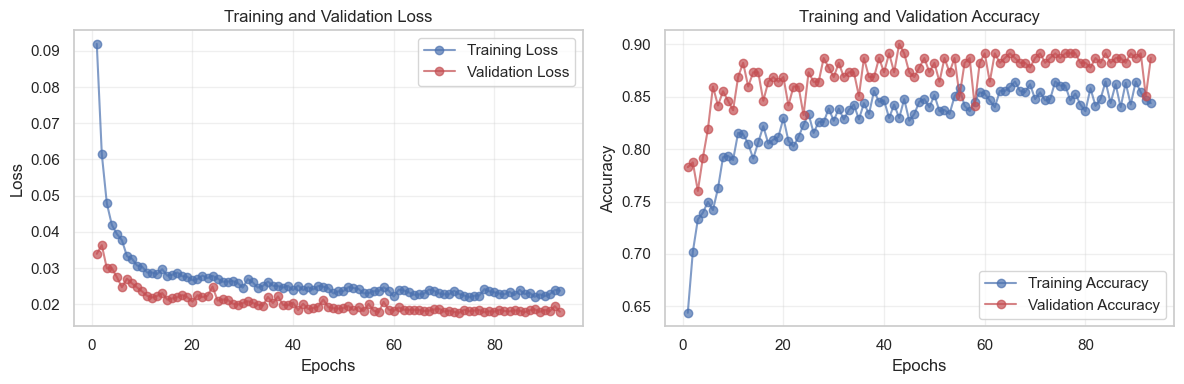


Model Performance Summary:
   Metric  Value
----------------
 Accuracy 0.8839
Precision 0.8781
   Recall 0.8839
 F1-Score 0.8698


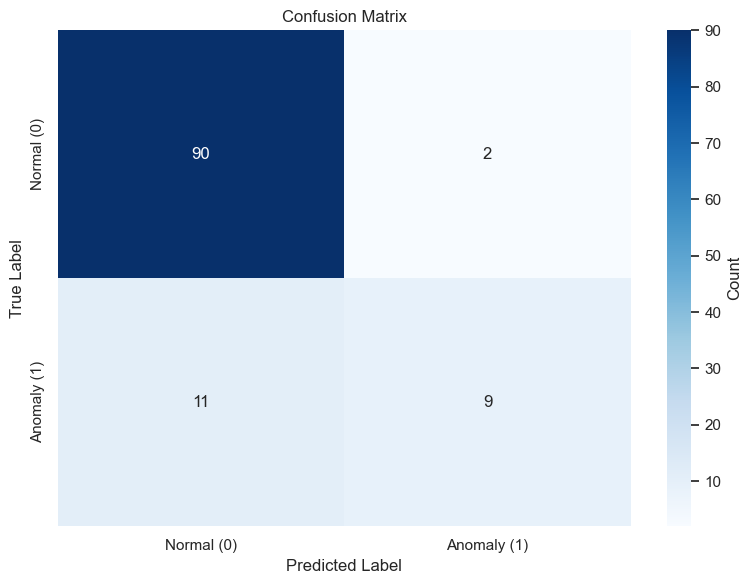

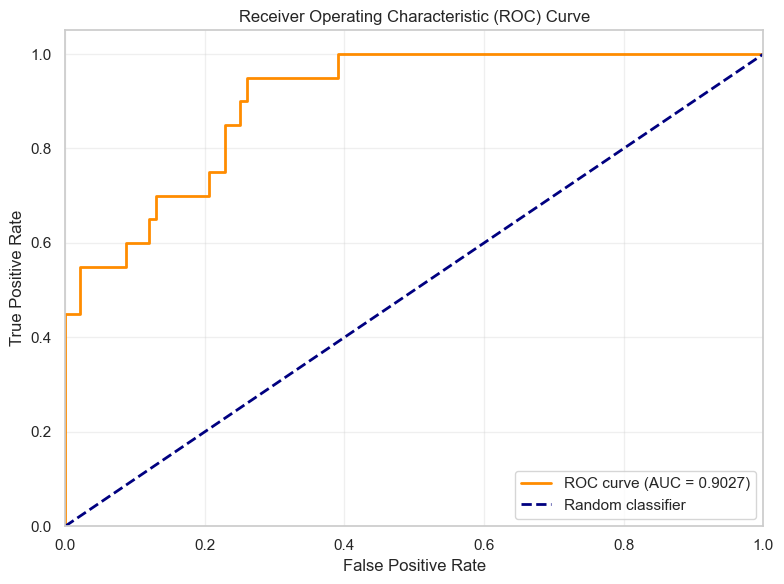


AUC Score: 0.9027


In [11]:
# Initialize classifier
classifier = LSTMTimeSeriesClassifier()

# Create data loaders
train_loader, val_loader, test_loader = classifier.create_data_loaders(
    X_df, y, window_size=4, overlap=3, batch_size=4, _shuffle=True, train_split=0.7, val_split=0.2
)

# Train the model
classifier.fit_with_loaders(
    train_loader, val_loader,
    epochs=100,
    learning_rate=0.001,
    hidden_sizes=[64, 32],
    bidirectional=True,
    focal_loss_gamma=2.0,
    focal_loss_alpha=0.25, 
    patience=20,
)

# After training the model
classifier.plot_training_history()

# Evaluate with all visualizations
metrics, predictions = classifier.evaluate_with_loader(test_loader, plot_results=True)

# LSTM Interpretability Analysis Summary

## Analysis Methods
1. **Gradient-based Importance**
   - Measures feature contribution via input gradients
   - Outputs: Mean importance scores with standard deviations

2. **Integrated Gradients**
   - More stable attribution by integrating gradients from baseline
   - Baseline options: zero, mean, or random
   - Outputs: Feature attributions

3. **Permutation Importance**
   - Measures accuracy drop when features are permuted
   - Computed over multiple repeats for stability
   - Outputs: Importance scores and baseline accuracy

4. **Attention-like Weights**
   - Analyzes hidden state magnitudes in final LSTM layer
   - Softmax-normalized to resemble attention weights
   - Outputs: Mean attention weights across timesteps

## Key Outputs
- **Feature Importance Scores**
  - Per-feature importance values from each method
  - Standard deviations for reliability assessment
- **Timestep Importance**
  - Importance scores for each timestep in sequence
- **Top Feature Identification**
  - Ranking of most important features
  - Cross-method consistency analysis

## Visualization Components
1. **Feature Importance Comparison**
   - Bar plots of top features by method
   - Heatmap showing normalized importance across methods
   - Average importance across all methods

2. **Interpretation Report**
   - Top feature ranking with scores
   - Method-specific insights
   - Reliability assessment
   - Key recommendations

## Technical Implementation
- **Device-aware computation** (CPU/GPU)
- **Batch processing** for efficiency
- **Configurable parameters**:
  - Number of samples
  - Number of integration steps (IG)
  - Baseline methods
  - Number of permutation repeats

In [20]:
class LSTMInterpretabilityAnalyzer:
    """
    Comprehensive interpretability analysis for LSTM time series classifiers.
    
    This class provides multiple techniques to understand what the LSTM model
    has learned and which features/time steps are most important for predictions.
    """
    
    def __init__(self, model, classifier, device=None):
        """
        Initialize the analyzer.
        
        Parameters:
        -----------
        model : LSTMModel
            Trained LSTM model
        classifier : LSTMTimeSeriesClassifier
            The classifier instance containing the trained model
        device : str
            Device to use for computations
        """
        self.model = model
        self.classifier = classifier
        self.device = device if device else ('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.eval()
        
    def compute_gradient_based_importance(self, data_loader, class_idx=1, n_samples=100):
        """
        Compute feature importance using gradient-based methods.
        
        This method calculates how much each input feature contributes to the
        prediction by analyzing gradients with respect to inputs.
        
        Parameters:
        -----------
        data_loader : DataLoader
            Data loader containing samples to analyze
        class_idx : int
            Class index to compute importance for
        n_samples : int
            Number of samples to analyze
            
        Returns:
        --------
        importance_scores : dict
            Dictionary containing various importance measures
        """
        self.model.eval()
        
        feature_gradients = []
        timestep_gradients = []
        sample_count = 0
        
        print(f"Computing gradient-based importance for {min(n_samples, len(data_loader.dataset))} samples...")
        
        for batch_idx, (data, targets) in enumerate(data_loader):
            if sample_count >= n_samples:
                break
                
            data = data.to(self.device)
            data.requires_grad_(True)
            
            # Forward pass
            outputs = self.model(data)
            
            # Get predictions for the specified class
            class_scores = outputs[:, class_idx]
            
            # Backward pass
            self.model.zero_grad()
            class_scores.sum().backward()
            
            # Get gradients
            gradients = data.grad.detach().cpu().numpy()
            
            # Store gradients for each sample in batch
            for i in range(gradients.shape[0]):
                if sample_count >= n_samples:
                    break
                    
                sample_grad = gradients[i]  # Shape: (seq_len, n_features)
                
                # Feature-wise importance (average across time steps)
                feature_importance = np.mean(np.abs(sample_grad), axis=0)
                feature_gradients.append(feature_importance)
                
                # Time step importance (average across features)
                timestep_importance = np.mean(np.abs(sample_grad), axis=1)
                timestep_gradients.append(timestep_importance)
                
                sample_count += 1
        
        # Aggregate results
        feature_gradients = np.array(feature_gradients)
        timestep_gradients = np.array(timestep_gradients)
        
        importance_scores = {
            'feature_importance': np.mean(feature_gradients, axis=0),
            'feature_importance_std': np.std(feature_gradients, axis=0),
            'timestep_importance': np.mean(timestep_gradients, axis=0),
            'timestep_importance_std': np.std(timestep_gradients, axis=0),
            'individual_feature_gradients': feature_gradients,
            'individual_timestep_gradients': timestep_gradients
        }
        
        return importance_scores
    
    def compute_integrated_gradients(self, data_loader, baseline_method='zero', 
                                   n_steps=50, n_samples=50, class_idx=1):
        """
        Compute Integrated Gradients for more stable attribution.
        
        Integrated Gradients provides a more stable and theoretically grounded
        approach to feature attribution by integrating gradients along a path
        from a baseline to the input.
        
        Parameters:
        -----------
        data_loader : DataLoader
            Data loader containing samples to analyze
        baseline_method : str
            Method to create baseline ('zero', 'mean', 'random')
        n_steps : int
            Number of integration steps
        n_samples : int
            Number of samples to analyze
        class_idx : int
            Class index to compute importance for
            
        Returns:
        --------
        integrated_gradients : dict
            Dictionary containing integrated gradient attributions
        """
        self.model.eval()
        
        all_attributions = []
        sample_count = 0
        
        print(f"Computing Integrated Gradients with {n_steps} steps for {n_samples} samples...")
        
        for batch_idx, (data, targets) in enumerate(data_loader):
            if sample_count >= n_samples:
                break
                
            data = data.to(self.device)
            
            for i in range(data.shape[0]):
                if sample_count >= n_samples:
                    break
                    
                sample = data[i:i+1]  # Keep batch dimension
                
                # Create baseline
                if baseline_method == 'zero':
                    baseline = torch.zeros_like(sample)
                elif baseline_method == 'mean':
                    baseline = torch.mean(data, dim=0, keepdim=True)
                elif baseline_method == 'random':
                    baseline = torch.randn_like(sample) * 0.1
                
                # Compute integrated gradients
                attributions = self._compute_integrated_gradients_single(
                    sample, baseline, n_steps, class_idx
                )
                
                all_attributions.append(attributions.cpu().numpy())
                sample_count += 1
        
        all_attributions = np.array(all_attributions)
        
        integrated_gradients = {
            'feature_attributions': np.mean(np.mean(np.abs(all_attributions), axis=1), axis=0),
            'timestep_attributions': np.mean(np.mean(np.abs(all_attributions), axis=2), axis=0),
            'individual_attributions': all_attributions,
            'baseline_method': baseline_method
        }
        
        return integrated_gradients
    
    def _compute_integrated_gradients_single(self, input_tensor, baseline, n_steps, class_idx):
        """Helper method to compute integrated gradients for a single sample."""
        # Generate interpolated inputs
        alphas = torch.linspace(0, 1, n_steps, device=self.device)
        gradients = []
        
        for alpha in alphas:
            interpolated = baseline + alpha * (input_tensor - baseline)
            interpolated.requires_grad_(True)
            
            output = self.model(interpolated)
            class_score = output[0, class_idx]
            
            self.model.zero_grad()
            class_score.backward()
            
            gradients.append(interpolated.grad.detach())
        
        # Average gradients and multiply by input difference
        avg_gradients = torch.mean(torch.stack(gradients), dim=0)
        integrated_gradients = (input_tensor - baseline) * avg_gradients
        
        return integrated_gradients.squeeze(0)
    
    def compute_permutation_importance(self, data_loader, n_samples=100, n_repeats=10):
        """
        Compute permutation-based feature importance.
        
        This method measures importance by observing how much the model's
        performance degrades when each feature is randomly permuted.
        
        Parameters:
        -----------
        data_loader : DataLoader
            Data loader containing samples to analyze
        n_samples : int
            Number of samples to use for analysis
        n_repeats : int
            Number of permutation repeats for stability
            
        Returns:
        --------
        permutation_importance : dict
            Dictionary containing permutation importance scores
        """
        self.model.eval()
        
        # Get baseline accuracy
        baseline_accuracy = self._compute_accuracy_subset(data_loader, n_samples)
        
        print(f"Baseline accuracy: {baseline_accuracy:.4f}")
        print(f"Computing permutation importance with {n_repeats} repeats...")
        
        # Get sample data for analysis
        sample_data, sample_targets = self._get_sample_data(data_loader, n_samples)
        n_features = sample_data.shape[2]
        
        feature_importance_scores = []
        
        for feature_idx in range(n_features):
            feature_scores = []
            
            for repeat in range(n_repeats):
                # Create permuted version
                permuted_data = sample_data.clone()
                perm_indices = torch.randperm(permuted_data.shape[0])
                permuted_data[:, :, feature_idx] = permuted_data[perm_indices, :, feature_idx]
                
                # Compute accuracy with permuted feature
                permuted_accuracy = self._compute_accuracy_tensor(permuted_data, sample_targets)
                
                # Importance is the drop in accuracy
                importance = baseline_accuracy - permuted_accuracy
                feature_scores.append(importance)
            
            feature_importance_scores.append(np.mean(feature_scores))
            if (feature_idx + 1) % 10 == 0:  # Print progress every 10 features
                print(f"Processed {feature_idx + 1}/{n_features} features...")
        
        permutation_importance = {
            'feature_importance': np.array(feature_importance_scores),
            'baseline_accuracy': baseline_accuracy,
            'n_repeats': n_repeats
        }
        
        return permutation_importance
    
    def compute_attention_weights(self, data_loader, n_samples=50):
        """
        Compute attention-like weights for LSTM hidden states.
        
        Although standard LSTMs don't have explicit attention mechanisms,
        we can analyze the magnitude of hidden states to understand which
        time steps the model focuses on.
        
        Parameters:
        -----------
        data_loader : DataLoader
            Data loader containing samples to analyze
        n_samples : int
            Number of samples to analyze
            
        Returns:
        --------
        attention_weights : dict
            Dictionary containing attention-like weights
        """
        self.model.eval()
        
        # We need to modify the forward pass to capture hidden states
        all_attention_weights = []
        sample_count = 0
        
        print(f"Computing attention-like weights for {n_samples} samples...")
        
        for batch_idx, (data, targets) in enumerate(data_loader):
            if sample_count >= n_samples:
                break
                
            data = data.to(self.device)
            
            # Forward pass with hidden state capture
            with torch.no_grad():
                x = data
                for i, lstm in enumerate(self.model.lstm_layers):
                    lstm_out, _ = lstm(x)
                    
                    # For the last LSTM layer, compute attention weights
                    if i == len(self.model.lstm_layers) - 1:
                        # Compute attention weights based on hidden state magnitudes
                        hidden_magnitudes = torch.norm(lstm_out, dim=2)  # (batch, seq_len)
                        attention_weights = F.softmax(hidden_magnitudes, dim=1)
                        
                        for j in range(min(attention_weights.shape[0], n_samples - sample_count)):
                            all_attention_weights.append(attention_weights[j].cpu().numpy())
                            sample_count += 1
                    
                    # Apply batch norm and dropout (simplified)
                    batch_size, seq_len, features = lstm_out.shape
                    lstm_out = lstm_out.contiguous().view(batch_size * seq_len, features)
                    lstm_out = self.model.batch_norms[i](lstm_out)
                    lstm_out = lstm_out.view(batch_size, seq_len, features)
                    x = lstm_out
        
        all_attention_weights = np.array(all_attention_weights)
        
        attention_results = {
            'mean_attention': np.mean(all_attention_weights, axis=0),
            'std_attention': np.std(all_attention_weights, axis=0),
            'individual_attention': all_attention_weights
        }
        
        return attention_results
    
    def _get_sample_data(self, data_loader, n_samples):
        """Helper method to extract sample data from data loader."""
        all_data = []
        all_targets = []
        sample_count = 0
        
        for data, targets in data_loader:
            batch_size = data.shape[0]
            samples_to_take = min(batch_size, n_samples - sample_count)
            
            all_data.append(data[:samples_to_take])
            all_targets.append(targets[:samples_to_take])
            
            sample_count += samples_to_take
            if sample_count >= n_samples:
                break
        
        return torch.cat(all_data, dim=0), torch.cat(all_targets, dim=0)
    
    def _compute_accuracy_subset(self, data_loader, n_samples):
        """Helper method to compute accuracy on a subset of data."""
        sample_data, sample_targets = self._get_sample_data(data_loader, n_samples)
        return self._compute_accuracy_tensor(sample_data, sample_targets)
    
    def _compute_accuracy_tensor(self, data, targets):
        """Helper method to compute accuracy from tensors."""
        with torch.no_grad():
            data = data.to(self.device)
            targets = targets.to(self.device)
            
            outputs = self.model(data)
            _, predicted = torch.max(outputs, 1)
            
            accuracy = (predicted == targets).float().mean().item()
            return accuracy
    
    def _get_top_features(self, importance_results, feature_names, top_k=5):
        """
        Get top k features based on average importance across all methods.
        
        Parameters:
        -----------
        importance_results : dict
            Dictionary containing results from different importance methods
        feature_names : list
            Names of features
        top_k : int
            Number of top features to return
            
        Returns:
        --------
        top_features_info : dict
            Dictionary containing information about top features
        """
        # Calculate average importance across all methods
        importance_matrix = np.array([results['feature_importance'] for results in importance_results.values()])
        avg_importance = np.mean(importance_matrix, axis=0)
        
        # Get top k indices
        top_indices = np.argsort(avg_importance)[::-1][:top_k]
        
        top_features_info = {
            'indices': top_indices,
            'names': [feature_names[i] for i in top_indices],
            'avg_importance': avg_importance[top_indices],
            'all_avg_importance': avg_importance
        }
        
        return top_features_info
    
    def plot_feature_importance_comparison(self, importance_results, feature_names=None, 
                                         top_k=5, figsize=(16, 12)):
        """
        Plot comparison of different feature importance methods focusing on top k features.
        
        Parameters:
        -----------
        importance_results : dict
            Dictionary containing results from different importance methods
        feature_names : list
            Names of features for plotting
        top_k : int
            Number of top features to display
        figsize : tuple
            Figure size for the plot
        """
        n_features = len(list(importance_results.values())[0]['feature_importance'])
        
        if feature_names is None:
            feature_names = [f'Feature_{i}' for i in range(n_features)]
        
        # Get top features
        top_features_info = self._get_top_features(importance_results, feature_names, top_k)
        top_indices = top_features_info['indices']
        top_names = top_features_info['names']
        
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle(f'Feature Importance Comparison - Top {top_k} Features', fontsize=16, fontweight='bold')
        
        method_names = list(importance_results.keys())
        colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
        
        # Plot individual methods (first 4 subplots)
        plot_idx = 0
        for idx, (method_name, results) in enumerate(importance_results.items()):
            if plot_idx >= 4:  # Limit to 4 method plots to save space
                break
                
            row, col = plot_idx // 2, plot_idx % 2
            ax = axes[row, col]
            
            # Get importance for top features only
            importance = results['feature_importance'][top_indices]
            
            bars = ax.bar(range(len(importance)), importance, 
                         color=colors[idx % len(colors)], alpha=0.7, edgecolor='black')
            
            ax.set_title(f'{method_name.replace("_", " ").title()}', fontweight='bold')
            ax.set_xlabel('Top Features')
            ax.set_ylabel('Importance Score')
            ax.set_xticks(range(len(top_names)))
            ax.set_xticklabels(top_names, rotation=45, ha='right')
            ax.grid(True, alpha=0.3)
            
            # Add value labels on bars
            for bar, value in zip(bars, importance):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                       f'{value:.3f}', ha='center', va='bottom', fontsize=9)
            
            plot_idx += 1
        
        # Comparison heatmap (subplot 2,2)
        ax_heatmap = axes[1, 1]
        
        # Normalize importance scores for better comparison
        comparison_matrix = []
        normalized_methods = []
        
        for method_name, results in importance_results.items():
            importance = results['feature_importance'][top_indices]
            # Normalize to 0-1 scale
            if importance.max() > importance.min():
                normalized = (importance - importance.min()) / (importance.max() - importance.min())
            else:
                normalized = np.ones_like(importance) * 0.5
            comparison_matrix.append(normalized)
            normalized_methods.append(method_name.replace('_', ' ').title())
        
        comparison_matrix = np.array(comparison_matrix)
        
        import seaborn as sns
        sns.heatmap(comparison_matrix, 
                    xticklabels=top_names,
                    yticklabels=normalized_methods,
                    annot=True, 
                    fmt='.3f', 
                    cmap='RdYlBu_r',
                    center=0.5,
                    ax=ax_heatmap)
        
        ax_heatmap.set_title(f'Top {top_k} Features Heatmap', fontsize=12, fontweight='bold')
        ax_heatmap.set_xlabel('Features')
        ax_heatmap.set_ylabel('Methods')
        
        # Average importance ranking (subplot 2,1)
        ax_avg = axes[1, 0]
        avg_importance = top_features_info['avg_importance']
        
        bars = ax_avg.bar(range(len(avg_importance)), avg_importance, 
                         color='purple', alpha=0.7, edgecolor='black')
        
        ax_avg.set_title('Average Importance Across Methods', fontweight='bold')
        ax_avg.set_xlabel('Top Features')
        ax_avg.set_ylabel('Average Importance')
        ax_avg.set_xticks(range(len(top_names)))
        ax_avg.set_xticklabels(top_names, rotation=45, ha='right')
        ax_avg.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars, avg_importance):
            height = bar.get_height()
            ax_avg.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                       f'{value:.3f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    
    def generate_interpretation_report(self, importance_results, feature_names=None, top_k=5):
        """
        Generate a comprehensive interpretation report focusing on top features.
        
        Parameters:
        -----------
        importance_results : dict
            Dictionary containing results from different importance methods
        feature_names : list
            Names of features
        top_k : int
            Number of top features to focus on in the report
        """
        n_features = len(list(importance_results.values())[0]['feature_importance'])
        
        if feature_names is None:
            feature_names = [f'Feature_{i}' for i in range(n_features)]
        
        # Get top features information
        top_features_info = self._get_top_features(importance_results, feature_names, top_k)
        top_indices = top_features_info['indices']
        top_names = top_features_info['names']
        
        report = []
        report.append("LSTM MODEL INTERPRETABILITY ANALYSIS")
        report.append("=" * 50)
        report.append(f"Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"Total Features: {n_features}")
        report.append(f"Top Features Analyzed: {top_k}")
        report.append(f"Analysis Methods: {', '.join(importance_results.keys())}")
        report.append("\n")
        
        # Top features ranking
        report.append(f"TOP {top_k} MOST IMPORTANT FEATURES")
        report.append("-" * 35)
        
        for rank, (feature_idx, feature_name, avg_imp) in enumerate(zip(top_indices, top_names, top_features_info['avg_importance'])):
            report.append(f"{rank+1:2d}. {feature_name:<12} (Avg Score: {avg_imp:.4f})")
        report.append("\n")
        
        # Method-specific insights for top features
        report.append("METHOD-SPECIFIC INSIGHTS (TOP FEATURES)")
        report.append("-" * 40)
        
        for method_name, results in importance_results.items():
            report.append(f"\n{method_name.replace('_', ' ').title()}:")
            importance = results['feature_importance']
            
            # Top 3 from our top_k features for this method
            top_method_indices = np.argsort(importance[top_indices])[::-1][:min(3, top_k)]
            for i, rel_idx in enumerate(top_method_indices):
                abs_idx = top_indices[rel_idx]
                report.append(f"  {i+1}. {feature_names[abs_idx]}: {importance[abs_idx]:.4f}")
        
        report.append("\n")
        
        # Feature consistency analysis
        
        # Calculate consistency for top features
        importance_matrix = np.array([results['feature_importance'] for results in importance_results.values()])
        top_feature_matrix = importance_matrix[:, top_indices]
        feature_consistency = np.std(top_feature_matrix, axis=0)
        
        # Key insights and recommendations
        report.append("KEY INSIGHTS & RECOMMENDATIONS")
        report.append("-" * 32)
        
        # Most reliable features (low variance, high importance)
        reliability_score = top_features_info['avg_importance'] / (feature_consistency + 1e-8)
        most_reliable_idx = np.argmax(reliability_score)
        
        report.append("Most reliable feature for predictions:")
        report.append(f"  • {top_names[most_reliable_idx]} (high importance + low variance)")
        report.append("\nFeature importance distribution:")
        
        # Calculate some statistics
        all_importance = top_features_info['all_avg_importance']
        top_importance_sum = np.sum(top_features_info['avg_importance'])
        total_importance_sum = np.sum(all_importance)
        top_contribution = (top_importance_sum / total_importance_sum) * 100
        
        report.append(f"  • Top {top_k} features account for {top_contribution:.1f}% of total importance")
        report.append(f"  • Remaining {n_features - top_k} features account for {100 - top_contribution:.1f}% of importance")
        
        if top_contribution > 70:
            report.append(f"  • Model relies heavily on these top {top_k} features")
        elif top_contribution > 50:
            report.append(f"  • Model shows moderate concentration on top {top_k} features")
        else:
            report.append(f"  • Model distributes importance more evenly across features")
        
        report.append("\nModel behavior characteristics:")
        method_agreement = np.corrcoef(importance_matrix)[0, 1] if len(importance_results) >= 2 else 1.0
        if method_agreement > 0.7:
            report.append("  • High agreement between different analysis methods (reliable results)")
        elif method_agreement > 0.4:
            report.append("  • Moderate agreement between analysis methods")
        else:
            report.append("  • Low agreement between methods (results should be interpreted carefully)")
        
        # Join report lines and print
        full_report = "\n".join(report)
        print(full_report)
        
        return full_report


def run_comprehensive_interpretability_analysis(classifier, test_loader, feature_names=None, top_k=5):
    """
    Run a comprehensive interpretability analysis on the LSTM classifier.
    
    Parameters:
    -----------
    classifier : LSTMTimeSeriesClassifier
        Trained classifier instance
    test_loader : DataLoader
        Test data loader
    feature_names : list
        Names of features (optional)
    top_k : int
        Number of top features to focus visualization on
        
    Returns:
    --------
    results : dict
        Dictionary containing all analysis results
    """
    print("Starting Comprehensive LSTM Interpretability Analysis")
    print("=" * 60)
    
    # Initialize analyzer
    analyzer = LSTMInterpretabilityAnalyzer(classifier.model, classifier)
    
    # Dictionary to store all results
    all_results = {}
    
    # 1. Gradient-based importance
    print("\n1. Computing Gradient-based Feature Importance...")
    gradient_results = analyzer.compute_gradient_based_importance(
        test_loader, class_idx=1, n_samples=100
    )
    all_results['gradient_based'] = gradient_results
    
    # 2. Integrated Gradients
    print("\n2. Computing Integrated Gradients...")
    integrated_results = analyzer.compute_integrated_gradients(
        test_loader, baseline_method='zero', n_steps=50, n_samples=50
    )
    all_results['integrated_gradients'] = integrated_results
    
    # 3. Permutation Importance
    print("\n3. Computing Permutation Importance...")
    permutation_results = analyzer.compute_permutation_importance(
        test_loader, n_samples=100, n_repeats=5
    )
    all_results['permutation_importance'] = permutation_results
    
    # 4. Attention-like weights
    print("\n4. Computing Attention-like Weights...")
    attention_results = analyzer.compute_attention_weights(
        test_loader, n_samples=50
    )
    all_results['attention_weights'] = attention_results
    
    # 5. Generate visualizations focusing on top features
    print(f"\n5. Generating Visualizations for Top {top_k} Features...")
    
    # Plot feature importance comparison
    importance_methods = {k: v for k, v in all_results.items() 
                         if 'feature_importance' in v}
    
    analyzer.plot_feature_importance_comparison(
        importance_methods, feature_names=feature_names, top_k=top_k
    )
    
    # 6. Generate comprehensive report
    print(f"\n6. Generating Interpretation Report (Top {top_k} Features)...")
    report = analyzer.generate_interpretation_report(
        importance_methods, feature_names=feature_names, top_k=top_k
    )
    
    print("\nAnalysis Complete!")
    print("=" * 60)
    
    return {
        'analyzer': analyzer,
        'results': all_results,
        'report': report
    }

Starting Comprehensive LSTM Interpretability Analysis

1. Computing Gradient-based Feature Importance...
Computing gradient-based importance for 100 samples...

2. Computing Integrated Gradients...
Computing Integrated Gradients with 50 steps for 50 samples...

3. Computing Permutation Importance...
Baseline accuracy: 0.8800
Computing permutation importance with 5 repeats...
Processed 10/42 features...
Processed 20/42 features...
Processed 30/42 features...
Processed 40/42 features...

4. Computing Attention-like Weights...
Computing attention-like weights for 50 samples...

5. Generating Visualizations for Top 5 Features...


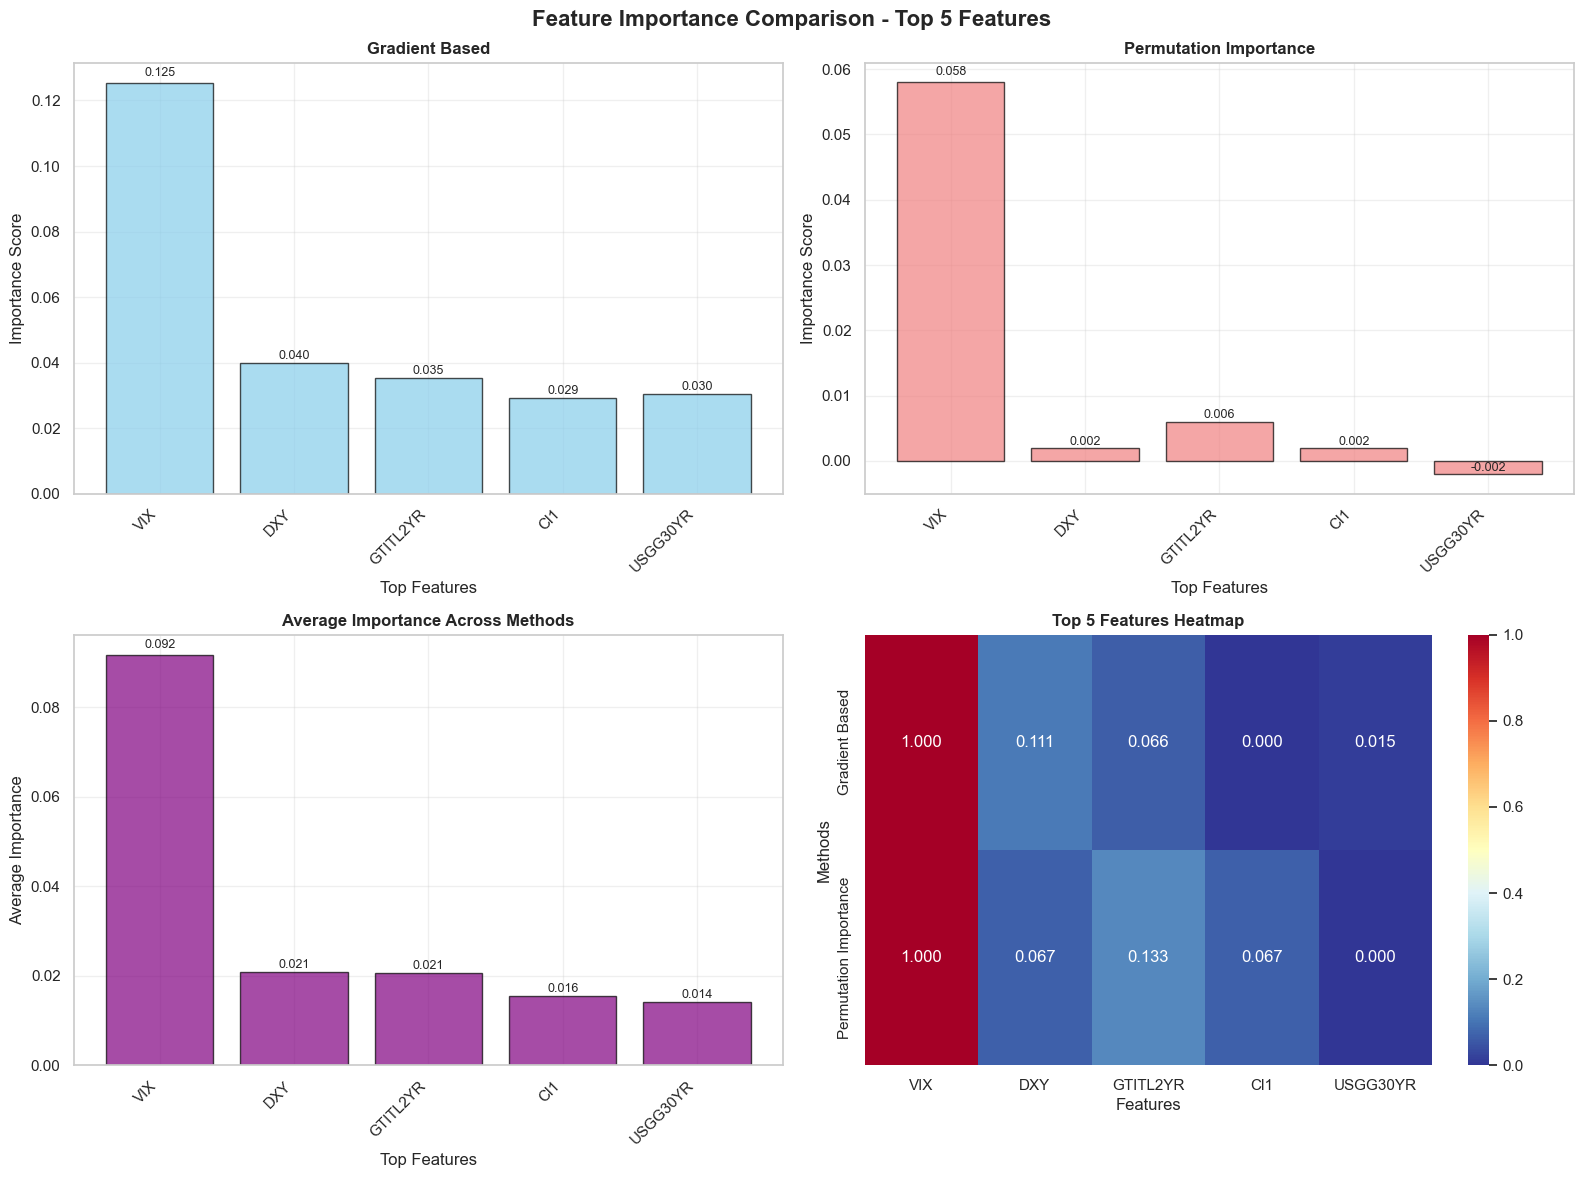


6. Generating Interpretation Report (Top 5 Features)...
LSTM MODEL INTERPRETABILITY ANALYSIS
Analysis Date: 2025-05-27 11:22:58
Total Features: 42
Top Features Analyzed: 5
Analysis Methods: gradient_based, permutation_importance


TOP 5 MOST IMPORTANT FEATURES
-----------------------------------
 1. VIX          (Avg Score: 0.0917)
 2. DXY          (Avg Score: 0.0209)
 3. GTITL2YR     (Avg Score: 0.0207)
 4. Cl1          (Avg Score: 0.0155)
 5. USGG30YR     (Avg Score: 0.0142)


METHOD-SPECIFIC INSIGHTS (TOP FEATURES)
----------------------------------------

Gradient Based:
  1. VIX: 0.1253
  2. DXY: 0.0398
  3. GTITL2YR: 0.0354

Permutation Importance:
  1. VIX: 0.0580
  2. GTITL2YR: 0.0060
  3. Cl1: 0.0020


KEY INSIGHTS & RECOMMENDATIONS
--------------------------------
Most reliable feature for predictions:
  • VIX (high importance + low variance)

Feature importance distribution:
  • Top 5 features account for 69.5% of total importance
  • Remaining 37 features account for 30.5%

In [21]:
# Define your feature names (replace with actual names)
feature_names = ['BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL']

# Run the complete analysis
analysis_results = run_comprehensive_interpretability_analysis(
    classifier=classifier,
    test_loader=test_loader,
    feature_names=feature_names
)